# IMPORTS

In [18]:
import numpy as np
import pandas as pd

from datetime import datetime, date
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

# PATHS

In [2]:
path_data = Path('./input')

In [3]:
path_plots = Path('./plots')

# PLOTS

In [4]:
tex_fonts = {
        "text.usetex": True,
        "font.family": "serif",
        "axes.titlesize": 10, 
        "axes.labelsize": 10,
        "font.size": 10,
        "legend.fontsize": 'xx-small',
        "legend.title_fontsize": 10,
        "xtick.labelsize": 9.5, #'xx-small',
        "ytick.labelsize": 9.5, #'xx-small',
        "ps.usedistiller": "xpdf"
        }
plt.rcParams.update(tex_fonts)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb,underscore}'

cm=1/2.54

# DATA

In [7]:
input_filename = path_data / 'clean_data.gz'
data = pd.read_csv(input_filename, compression=dict(method='gzip'),index_col='index')               
data

/tmp/ipykernel_344527/2133861222.py:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_filename, compression=dict(method='gzip'),index_col='index')


,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,locale,...,status,day,week,dayofyear,year,Terremoto,Futbol,CyberMonday,BlackFriday,Madre
index,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,National,...,holiday,1,1,1,2013,False,False,False,False,False
1,2016-05-07,7,POULTRY,737.38900,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
2,2016-05-07,7,PREPARED FOODS,225.25299,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
3,2016-05-07,7,PRODUCE,5946.38800,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
4,2016-05-07,7,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.13300,0,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000884,2017-08-15,9,PREPARED FOODS,154.55300,1,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000885,2017-08-15,9,PRODUCE,2419.72900,148,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False


In [12]:
data.store_nbr.unique()

array([ 1,  7,  8,  9, 54, 53,  6, 11, 12, 13, 10, 47, 48, 49, 45, 44, 46,
       51, 52,  5, 50, 26, 25, 27, 23, 24, 22, 30,  3, 31, 28, 29, 16, 17,
       18, 14, 15, 21, 20, 19,  2, 38, 39,  4, 37, 36, 35, 42, 43, 41, 40,
       33, 34, 32])

In [53]:
def heatmap(piv, xlab, ylab, title, path, filename, cm):
    # piv: pandas pivot table
    # xlab, ylab, title: text as x/y label & title
    # path, filename: to store the figure
    # cm: fig size in cm
    
    fig = plt.figure(figsize=(18*cm, 18*cm))
    
    # mask the upper triangle of the pivot table
    mask = np.triu(piv.corr())
    
    ax = sns.heatmap(piv,
                     annot=False, # True would annotate the values in each individual cell
                     fmt='.1f',
                     cmap='coolwarm',
                     square=True,
                     mask=mask,
                     linewidths=1,
                     cbar=True,
                     cbar_kws={'location': 'right', 'orientation': 'vertical', 'fraction': 0.025, 'aspect': 30},
                    )
    ax.set(xlabel=xlab, ylabel=ylab, title=title)
    
    plt.show()
    fig.tight_layout()
    file = path / str(filename)
    fig.savefig(file, format='pdf')

store_nbr      1       2      3       4         5      6            7   \
ind                                                                      
1             0.0     8.0    1.0     6.0   274.830   47.0   737.389000   
2          2293.0     0.0  367.0     0.0   133.000   22.0   225.252990   
3            33.0  2371.0   24.0     3.0   226.384    5.0  5946.388000   
4             0.0   222.0   15.0  3780.0  3983.000  315.0     0.000000   
5            20.0     9.0    3.0     0.0    51.000   20.0    86.076004   

store_nbr       8       9        10  ...        45     46        47      48  \
ind                                  ...                                      
1             8.00  5069.0    2.000  ...  3455.000  113.0   986.000     0.0   
2             0.00     0.0    1.000  ...  3692.000    4.0    40.000    17.0   
3            10.00   707.0    0.000  ...   961.031  886.0    35.000  7417.0   
4             0.00    40.0  137.009  ...   571.000   87.0  1684.396     0.0   
5      

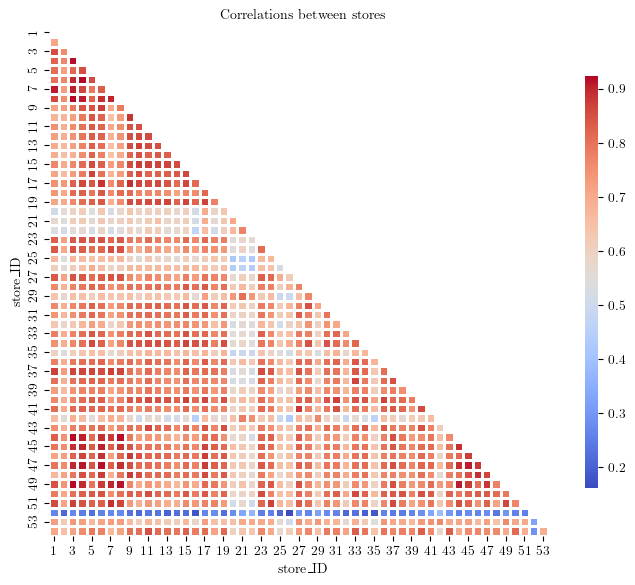

In [186]:
# create pivot table
df_store_nbr = data.loc[:,['store_nbr', 'sales']].copy()
# create an index increasing per entry of 'store_nbr'
# this new index will be used to reshape df_store_nbr via df.pivot
df_store_nbr['ind'] = 1
df_store_nbr['ind'] = df_store_nbr.groupby('store_nbr').ind.cumsum().values
print(df_store_nbr.pivot(index='ind', columns='store_nbr', values='sales').head())
# with such a df, it is possible to compute the correlation between stores
pivot_store_nbr = df_store_nbr.pivot(index='ind', columns='store_nbr', values='sales').corr()

# create heatmap
heatmap(pivot_store_nbr, 'store_ID', 'store_ID', 'Correlations between stores', path_plots, 'correlations_stores.pdf', cm)

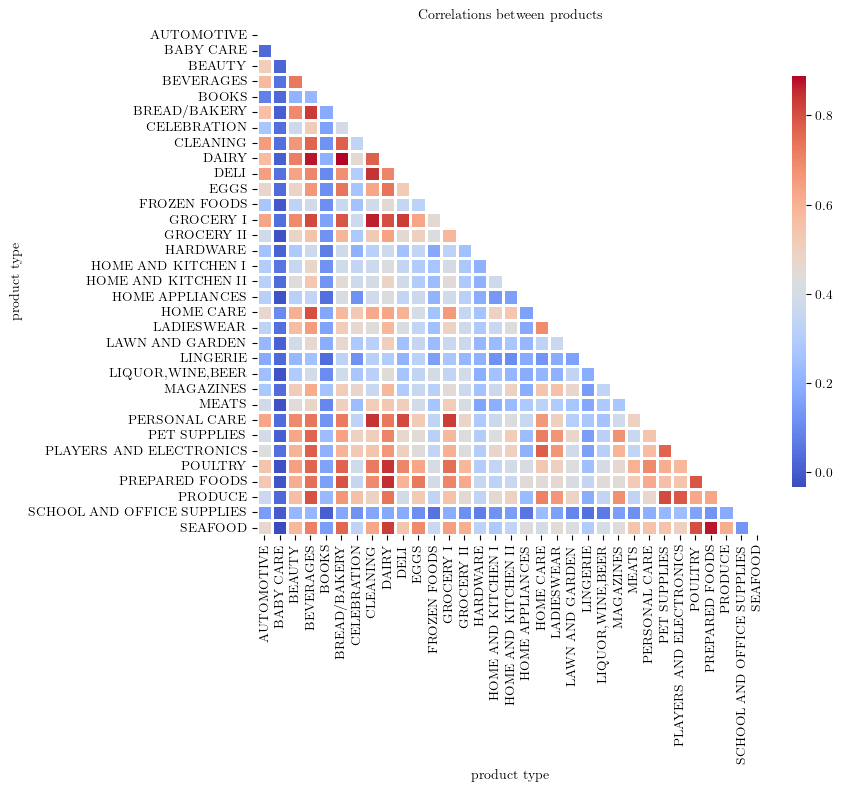

In [187]:
# create pivot table
df_products = data.loc[:,['family', 'sales']].copy()
df_products['ind'] = 1
df_products['ind'] = df_products.groupby('family').ind.cumsum().values
pivot_product = df_products.pivot(index='ind', columns='family', values='sales').corr()

# create heatmap
heatmap(pivot_product, 'product type', 'product type', 'Correlations between products', path_plots, 'correlations_products.pdf', cm)

In [159]:
df_products = data.loc[:,['family', 'sales']].copy()
df_products

,sales
sales,1.0


In [166]:
toto=data.groupby(['date', 'family']).sum()
titi = toto['sales']
titi

date        family                    
2013-01-01  AUTOMOTIVE                         0.000000
            BABY CARE                          0.000000
            BEAUTY                             2.000000
            BEVERAGES                        810.000000
            BOOKS                              0.000000
                                              ...      
2017-08-15  POULTRY                        17586.709986
            PREPARED FOODS                  4641.522980
            PRODUCE                       125108.971000
            SCHOOL AND OFFICE SUPPLIES      2530.000000
            SEAFOOD                          970.177005
Name: sales, Length: 55572, dtype: float64

In [160]:
data

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,locale,...,status,day,week,dayofyear,year,Terremoto,Futbol,CyberMonday,BlackFriday,Madre
index,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,National,...,holiday,1,1,1,2013,False,False,False,False,False
1,2016-05-07,7,POULTRY,737.38900,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
2,2016-05-07,7,PREPARED FOODS,225.25299,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
3,2016-05-07,7,PRODUCE,5946.38800,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
4,2016-05-07,7,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.13300,0,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000884,2017-08-15,9,PREPARED FOODS,154.55300,1,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000885,2017-08-15,9,PRODUCE,2419.72900,148,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False


In [179]:
df_products = data.loc[:,['family', 'sales']].copy()
df_products['ind'] = 1
df_products['ind'] = df_products.groupby('family').ind.cumsum().values
pivot_product = df_products.pivot(index='ind', columns='family', values='sales') #.corr()
pivot_product

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
ind,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,10.0,7125.0,0.0,1269.480,29.0,1686.0,2644.0,414.664,...,23.0,566.12800,255.0,11.0,10.0,737.38900,225.252990,5946.388,0.0,86.076004
2,8.0,1.0,5.0,5069.0,0.0,707.000,40.0,1054.0,1784.0,205.159,...,42.0,594.22200,454.0,21.0,24.0,984.36096,300.678000,7370.475,2.0,93.511000
3,11.0,0.0,1.0,4753.0,0.0,784.683,36.0,2603.0,1162.0,810.806,...,3.0,60.51900,288.0,0.0,51.0,559.63200,154.813000,4147.227,2.0,13.000000
4,13.0,0.0,3.0,1905.0,0.0,230.000,10.0,1377.0,293.0,243.000,...,23.0,522.82200,565.0,4.0,4.0,28.43700,61.000000,733.781,1.0,59.920998
5,10.0,0.0,7.0,5204.0,0.0,776.350,18.0,1555.0,1561.0,434.445,...,20.0,637.75700,408.0,18.0,13.0,912.91600,145.660000,3447.293,10.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90932,8.0,0.0,0.0,4332.0,0.0,304.000,4.0,1415.0,261.0,222.026,...,2.0,57.84200,169.0,0.0,2.0,59.61900,94.000000,915.371,0.0,3.000000
90933,7.0,0.0,6.0,2678.0,0.0,499.485,8.0,1004.0,845.0,328.256,...,6.0,417.34500,316.0,11.0,15.0,434.57000,102.341995,2073.636,0.0,47.575000
90934,5.0,0.0,11.0,3999.0,0.0,659.156,11.0,1139.0,1279.0,172.975,...,24.0,500.31198,238.0,5.0,19.0,622.67300,136.361000,5113.961,2.0,46.507000


In [180]:
data

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,locale,...,status,day,week,dayofyear,year,Terremoto,Futbol,CyberMonday,BlackFriday,Madre
index,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,National,...,holiday,1,1,1,2013,False,False,False,False,False
1,2016-05-07,7,POULTRY,737.38900,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
2,2016-05-07,7,PREPARED FOODS,225.25299,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
3,2016-05-07,7,PRODUCE,5946.38800,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
4,2016-05-07,7,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.13300,0,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000884,2017-08-15,9,PREPARED FOODS,154.55300,1,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000885,2017-08-15,9,PRODUCE,2419.72900,148,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False


In [181]:
data

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,locale,...,status,day,week,dayofyear,year,Terremoto,Futbol,CyberMonday,BlackFriday,Madre
index,,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,National,...,holiday,1,1,1,2013,False,False,False,False,False
1,2016-05-07,7,POULTRY,737.38900,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
2,2016-05-07,7,PREPARED FOODS,225.25299,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
3,2016-05-07,7,PRODUCE,5946.38800,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
4,2016-05-07,7,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Quito,Pichincha,D,8,National,...,holiday,5,18,128,2016,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.13300,0,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000884,2017-08-15,9,PREPARED FOODS,154.55300,1,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
3000885,2017-08-15,9,PRODUCE,2419.72900,148,Quito,Pichincha,B,6,NaN,...,work,1,33,227,2017,False,False,False,False,False
